<a href="https://colab.research.google.com/github/SanchithVel/OUDailySentimentAnaylsis/blob/main/OUDailySentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

url = "https://www.oudaily.com/"

response = requests.get(url)
content = response.content

soup = BeautifulSoup(content, "html.parser")

# Finding all <a> elements with class "tnt-asset-link"
asset_links = soup.find_all("a", {"class": "tnt-asset-link"})

link_texts = []
for link in asset_links:
    headlines = link.text.strip()

    # Removing extra spaces/special characters using regex
    headlines = re.sub(r'\s+', ' ', headlines)

    # Removing photo counts on articles (e.g., "+95", "+3")
    headlines = re.sub(r'\+\d+', '', headlines)

    if headlines:
        link_texts.append(headlines)

df = pd.DataFrame({'Headlines': link_texts})

df.to_excel("link_texts.xlsx", index=False)

In [105]:
def get_sentiment_label(headline):
    overall_polarity = sid.polarity_scores(headline)  # Get sentiment scores for the headline
    if overall_polarity['compound'] >= 0.05:
        return "Positive"
    elif overall_polarity['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

def get_sentiment_score(headline):
    overall_polarity = sid.polarity_scores(headline)  # Get sentiment scores for the headline
    return overall_polarity['compound']

sid = SentimentIntensityAnalyzer()
df['Polarity'] = df['Headlines'].apply(get_sentiment_label)
df['Polarity Score'] = df['Headlines'].apply(get_sentiment_score)
df = df[['Headlines', 'Polarity', 'Polarity Score']]  # Including the columns in DataFrame
df.to_excel("data.xlsx", index=True, index_label="Index")  # Save to Excel with index

In [ ]:
df.head()

,Headlines,Polarity,Polarity Score
0,Jalil Farooq and Deion Burks listed as probabl...,Neutral,0.0000
1,WATCH: Norman voters share what they believe i...,Positive,0.2960
2,Jalil Farooq and Deion Burks listed as probabl...,Neutral,0.0000
3,‘He had a big heart’: Former OU housing direct...,Neutral,0.0000
4,"OU College of Medicine expands programs, aims ...",Positive,0.5574


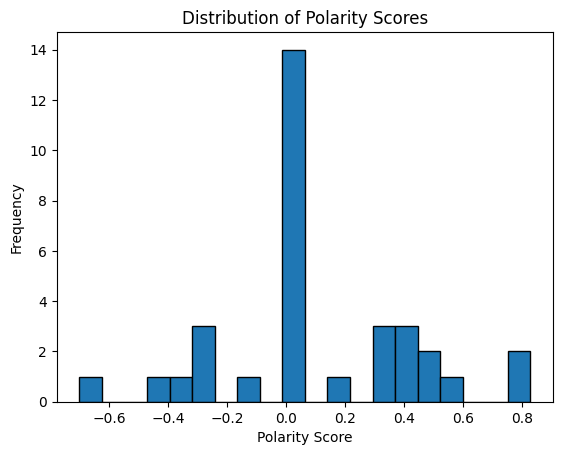

In [ ]:
# Score distribution

import matplotlib.pyplot as plt

plt.hist(df['Polarity Score'], bins=20, edgecolor='black')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

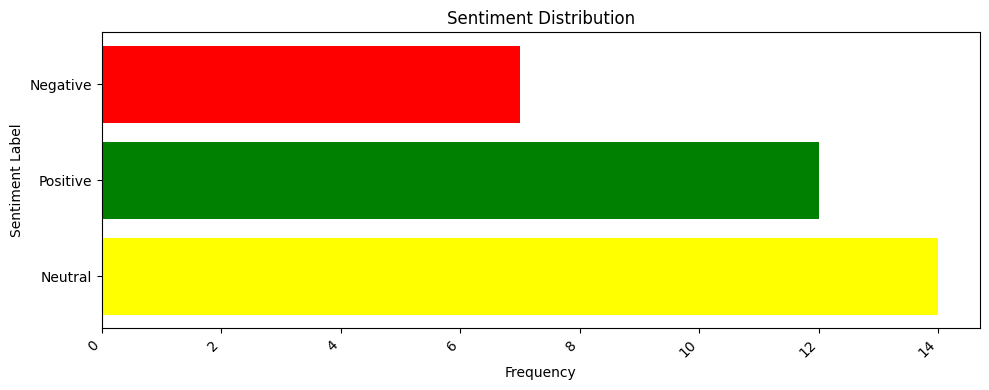

In [106]:
# Frequency distribution
sentiment_counts = df['Polarity'].value_counts()

plt.figure(figsize=(10, 4))
plt.barh(sentiment_counts.index, sentiment_counts.values, color=['yellow', 'green', 'red'])
plt.title('Sentiment Distribution')
plt.ylabel('Sentiment Label')
plt.xlabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()